## Importing the Halo Pipeline
The first line of code is an import statement, it brings in the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

For this jupyter notebook, the pipeline is generated from the YAML file, halo.yml. The default setting can be checked in readme.md in the data/Skypy folder.

In [1]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(sky_area=0.0002,m_max='1.0E+16',m_min='1.0E+12',z_max=5.00)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

In [2]:
halos= pipeline.halos
print(halos)

        z                 mass       
------------------ ------------------
  2.92814044041632 1194672653491.6228
1.5182354893352505 1290580693245.0354
3.3590926818094555 1401793534631.5432
3.1441456834927717 1726545707665.3738
 4.485122039114243  2516646794461.952
 4.180270575524224 2142822495602.3833
1.5648693502572593 2348466166566.2495
 3.819960788219089 1981735919593.4373
  1.97383932521442 1102277065992.5266
3.3253680860108523  1786044076456.923
               ...                ...
0.8984608234793645  3265159706230.267
 4.728265188105768 1170711692094.5461
1.5295146083998608 1017715845346.3279
2.4629682337592085  2091658174743.041
 4.488704642571357 2148362540818.0032
1.5075392050756682  2232636356022.314
2.3519832452584555 1089458064160.7273
 2.856433965583297  1400404012701.954
 2.275869611502427  1265974581610.424
 3.878334845204527  1062470030857.769
2.6674684378565807 3724037834647.2163
Length = 44 rows


## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ or shear $\gamma_tot$ at the origin due to all the halos.

In [3]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.halos.halos_lens import HalosLens
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos, sky_area=0.0001,cosmo=cosmo, samples_number= 1000)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,gamma1,gamma2 = halos_lens.get_convergence_shear(gamma12=True)
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)

kappa at center is:  0.3820760310245233
gamma1 at center is:  -0.03705633702632011
gamma2 at center is:  0.0032544546905425298


C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [4]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

  0%|          | 0/1000 [00:00<?, ?it/s]

For this halos list, elapsed time for computing weak-lensing maps: 30.25481939315796 seconds
[[0.35047567903401244, 0.10779819446980864], [0.41121457905468617, 0.03228505617979328], [0.48681835507213833, 0.052947952346268305], [0.2277140004336431, 0.009038384775860893], [0.27048542294849653, 0.043019468544395416], [0.3413837268428921, 0.03213500345185562], [0.3572841716925623, 0.04678763106668971], [0.511853787132921, 0.06650665401991618], [0.33475518745884614, 0.10440061211126254], [0.40348971663828337, 0.04920266078798455], [0.2537218463105617, 0.04645409036709234], [0.29714579893869164, 0.060901999123855056], [0.28270498060589677, 0.008795492240530845], [0.36221685095760847, 0.057277147372381106], [0.2293178924528405, 0.11063223308311405], [0.430490829095298, 0.10659947438613114], [0.32154139628648437, 0.061943203480288964], [0.34189044373356126, 0.09978331307153124], [0.2909736229739224, 0.06207079653742037], [0.2865438608612436, 0.026384186329907015], [0.2855102987364688, 0.063441

### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

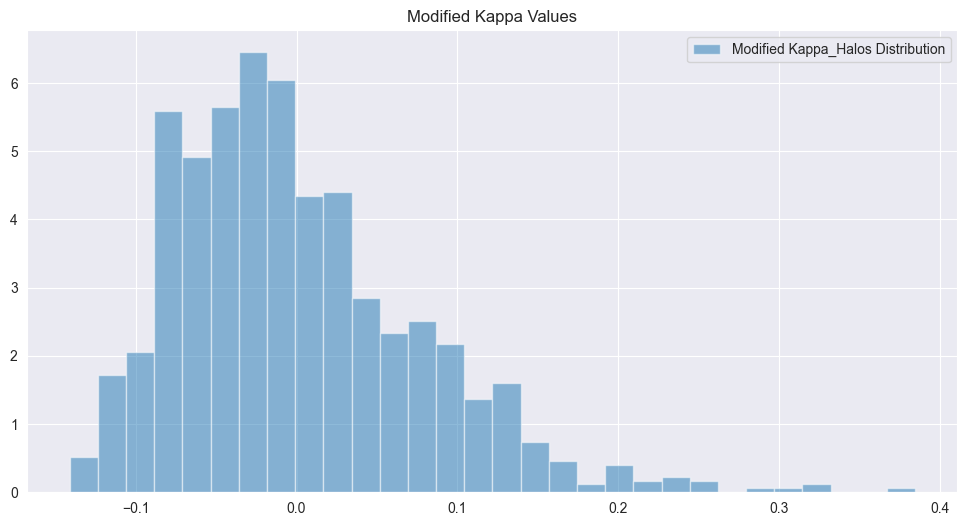

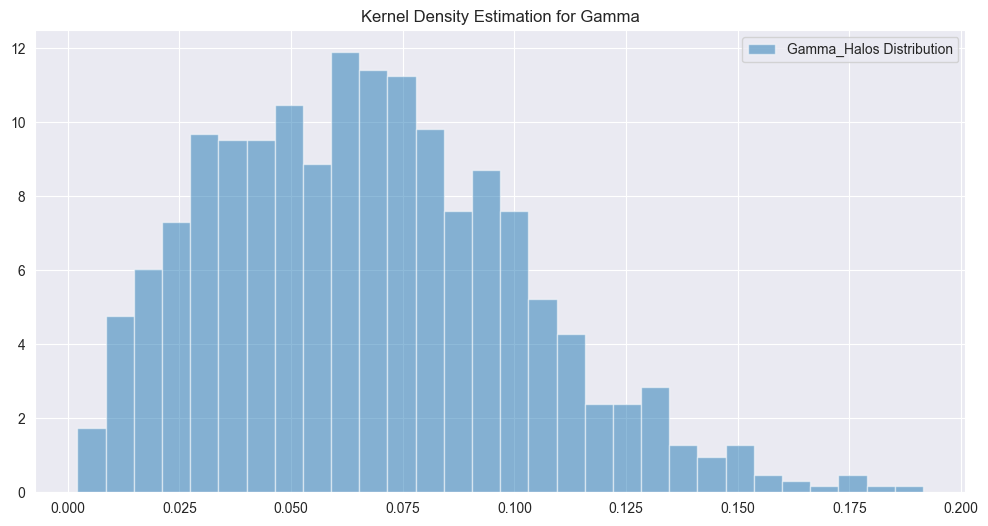

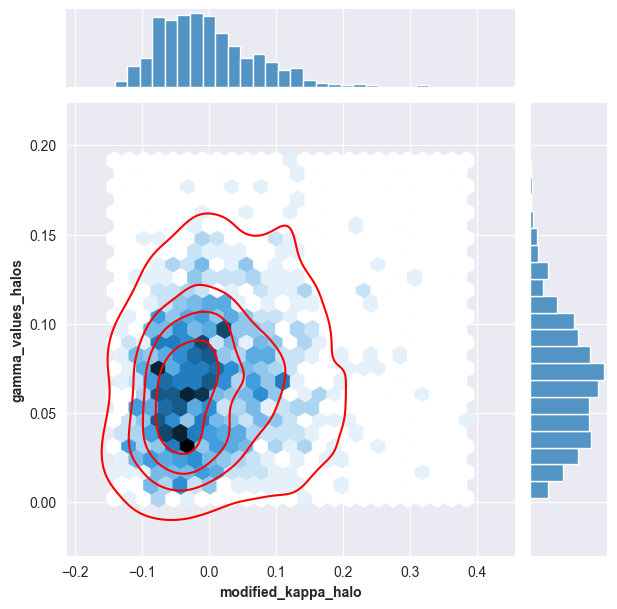

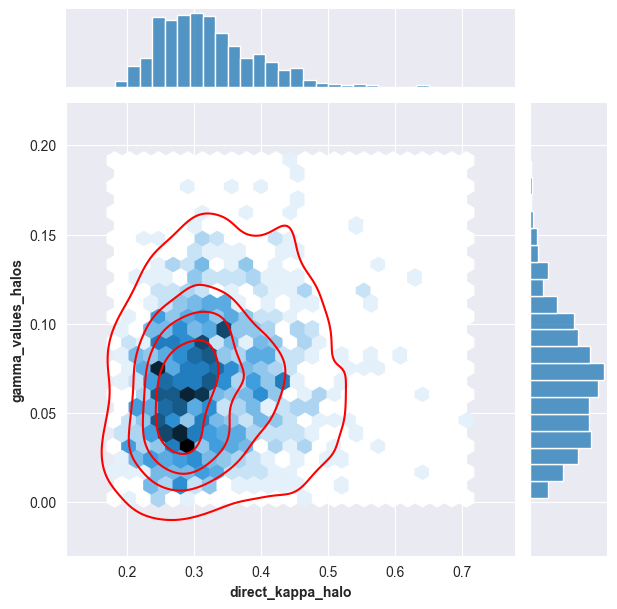

Spearman correlation coefficient:  0.16386467586467587
Kendall Tau correlation coefficient:  0.10923723723723724


In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title(f'Kernel Density Estimation for Gamma')
plt.legend()
plt.show()

import seaborn as sns
modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('modified_kappa_halo', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos,kind='hex')
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.set_xlabel('direct_kappa_halo', fontweight='bold')
unmodified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print('Spearman correlation coefficient: ', spearmanr(modified_kappa_halos, gamma_values_halos)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(modified_kappa_halos, gamma_values_halos)[0])

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

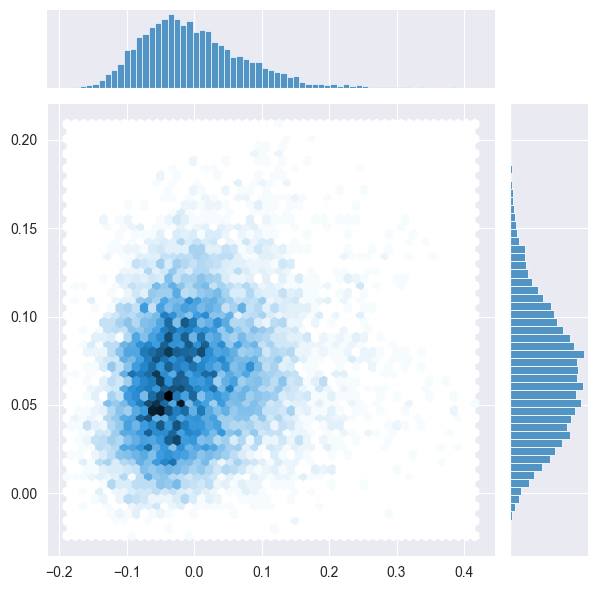

In [6]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [7]:
from sim_pipeline.halos.halos_plus_glass import run_halos_without_kde
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt


nk,ng = run_halos_without_kde(n_iterations=100, sky_area=0.0001, samples_number=100,cosmo=FlatLambdaCDM(H0=70, Om0=0.3),                                  m_min=None, m_max=None, z_max=None)


Processing halo-lists iterations:   0%|          | 0/100 [00:00<?, ?it/s]

The 100 halo-lists took 555.3029458522797 seconds to run


Visualization of ` run_halos_without_kde()`

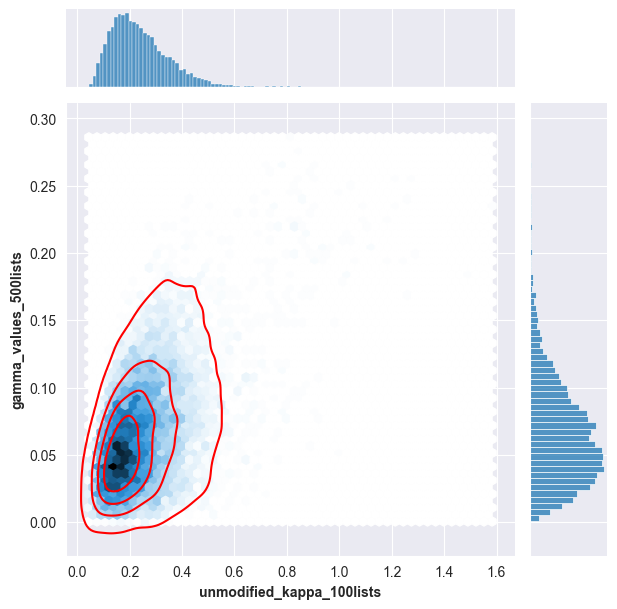

Spearman correlation coefficient:  0.41105771115057715
Kendall Tau correlation coefficient:  0.2831536753675367


In [8]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
modified_plot = sns.jointplot(x=nk, y=ng,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('unmodified_kappa_100lists', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_500lists', fontweight='bold')
plt.show()
print('Spearman correlation coefficient: ', spearmanr(nk, ng)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(nk, ng)[0])